In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

In [2]:
data=pd.read_csv("diamonds.csv")

посмотрим на статистические данные:

In [3]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [134]:
data.shape

(53940, 11)

In [135]:
data.isnull().any().any()

False

удалим неинформативные стоблцы:

In [5]:
data=data.drop("Unnamed: 0",axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
data["cut"].nunique()

5

In [8]:
data["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

посчитаем попарную корреляцию:

In [140]:
data.corr()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_16432\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


посмотрим на тепловую карту зависимости:

C:\Users\Huawei\AppData\Local\Temp\ipykernel_16432\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

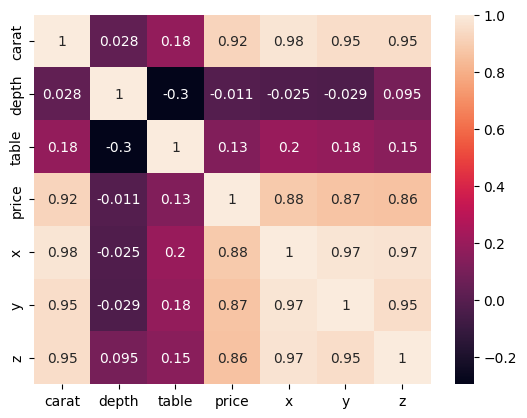

In [141]:
sns.heatmap(data.corr(),annot=True)

видно что price одинаково сильно зависим от размеров и каратов.

Кодирование категориальных признаков:

Принцип: для каждого категориального признака добавляются бинарные столбцы принадлежности обекта к одному из значений признака. Минусы: создается много дополнительных данных.

In [142]:
ohe=OneHotEncoder(sparse=True, drop='first')

In [143]:
X_obj=data.select_dtypes('object')

In [144]:
X_obj

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [145]:
ohe.fit(X_obj)

c:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=True)

In [146]:
codes= ohe.transform(X_obj).toarray()

In [147]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [148]:
feature_names=ohe.get_feature_names_out(['cut','color','clarity'])

In [149]:
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

создание датасета с закодированными признаками.

In [150]:
data_coded=pd.concat([data.select_dtypes(exclude='object'),
                     pd.DataFrame(codes,columns=feature_names).astype(int)],axis=1)

In [151]:
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Разделение на обучающую и тестовую выборку(доля тестовой 0.3):

In [152]:
x=data_coded.drop('price',axis=1)
y=data['price']

In [153]:
np.random.seed(10)

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

Масштабирование вещественных признаков:

In [155]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [156]:
x_train

array([[ 0.47663651,  0.59382772, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 0.92223735, -0.31901551, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.56309876,  0.4533903 ,  0.69922653, ..., -0.54398766,
        -0.27109753, -0.32179353],
       ...,
       [-0.9874805 , -0.10835938, -1.10137094, ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.56309876,  0.52360901,  1.1493759 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 1.00711369,  0.38317159,  0.24907717, ..., -0.54398766,
        -0.27109753, -0.32179353]])

Оценка лин. регрессии на тренировочной выборке:

постоим модель линейной регрессии, где целевая переменная - price.

In [157]:
lin_regr=LinearRegression()
lin_regr.fit(x_train,y_train)

LinearRegression()

In [158]:
print("MSE train:", mean_squared_error(y_train,lin_regr.predict(x_train)))
print("MSE test:", mean_squared_error(y_test,lin_regr.predict(x_test)))

MSE train: 1268454.9559615587
MSE test: 1303126.7488467365


посмотрим на вектор весов:

In [159]:
coef_df=pd.DataFrame(lin_regr.coef_,index=x.columns, columns=['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-959.001979
color_J,-513.635437
color_I,-431.944388
color_H,-349.279490
z,-238.038613
color_G,-190.841862
color_F,-102.443444
color_E,-78.915265
depth,-73.111300
table,-67.588760


Регуляризация L1(lasso) и L2(ridge) (гиперпараметр = 10):

L1 заключается в добавлении суммы модулей весов к функионалу ошибки. Cумма домножена на параметр lambda. Cуть заключается в добавлении штрафа за слишком большие веса.
Одно из свойств: недеффиринцуриема в окрестности нуля, это свойство позволяет L1 занулять слишом маленькие веса, те избавляться от ненужных признаков.

In [160]:
lasso=linear_model.Lasso(alpha=10)

In [161]:
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [162]:
print("MSE train:", mean_squared_error(y_train,lasso.predict(x_train)))
print("MSE test:", mean_squared_error(y_test,lasso.predict(x_test)))

MSE train: 1330335.8661404853
MSE test: 1367367.040854752


Видно, что ошибка не уменьшилась. 

In [163]:
coef_lasso=pd.DataFrame(lasso.coef_,index=x.columns, columns=['coef_lasso'])
coef_lasso.sort_values(by=['coef_lasso'])

,coef_lasso
x,-488.898100
color_J,-453.057340
color_I,-360.543701
color_H,-275.572789
z,-194.282630
color_G,-112.156115
depth,-86.418657
table,-76.384212
color_F,-36.147716
color_E,-7.884083


одно из свойств: недеффиринцуриема в окрестности нуля, это свойство позволяет L1 занулять слишом маленькие веса, те избавляться от ненужных признаков.

In [164]:
ridge=linear_model.Ridge(alpha=10)

In [165]:
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [166]:
print("MSE train:", mean_squared_error(y_train,ridge.predict(x_train)))
print("MSE test:", mean_squared_error(y_test,ridge.predict(x_test)))

MSE train: 1268581.4112912414
MSE test: 1303825.362568864


Можно сделать вывод, что либо нужно менять гипер параметр, либо вообще не использовать регуляризацию. (модель не переобучена)

In [167]:
coef_ridge=pd.DataFrame(ridge.coef_,index=x.columns, columns=['coef_ridge'])
coef_ridge.sort_values(by=['coef_ridge'])

,coef_ridge
x,-906.609607
color_J,-512.295374
color_I,-430.678540
color_H,-348.399611
z,-247.347874
color_G,-190.282234
color_F,-102.265672
color_E,-78.503666
depth,-70.737168
table,-67.727091


In [168]:
df=pd.concat([coef_df,coef_lasso,coef_ridge],axis=1)

In [169]:
df

,coef,coef_lasso,coef_ridge
carat,5268.334845,4789.301380,5231.924260
depth,-73.111300,-86.418657,-70.737168
table,-67.588760,-76.384212,-67.727091
x,-959.001979,-488.898100,-906.609607
y,80.663235,-0.000000,71.895193
z,-238.038613,-194.282630,-247.347874
cut_Good,180.155737,55.057846,180.791648
cut_Ideal,421.771664,216.790822,423.061718
cut_Premium,345.464522,157.065492,346.348511
cut_Very Good,319.333157,149.175622,320.827107


In [170]:
alphas=[0.1, 1, 10, 100, 200]
lasso_euclid=[]
ridge_euclid=[]

посчитаем Евклидову норму для весов с различными гиперпараметрами:

In [ ]:
print('Евклидова норма весов Лассо')
for i in range(len(alphas)):
    lasso=linear_model.Lasso(alpha=alphas[i])
    lasso.fit(x_train,y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
print(lasso_euclid)

print('-----------')

print('Риджа')
for i in range(len(alphas)):
    ridge=linear_model.Ridge(alpha=alphas[i])
    ridge.fit(x_train,y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
print(ridge_euclid)

Евклтдова норма весов Лассо
[6622.347890309588, 6496.72103662704, 5346.090230121044, 3844.5750308244296, 3558.821444983833]
-----------
Риджа
[6636.589561423073, 6629.894491317052, 6564.347717436102, 6015.4000270732695, 5554.069324459526]


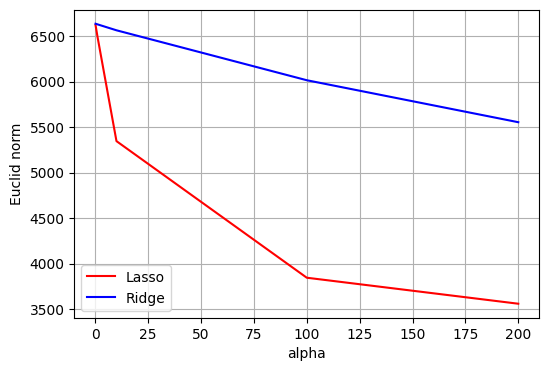

In [172]:
x1=alphas
fig,ax=plt.subplots(figsize=(6,4))

y1=lasso_euclid
y2=ridge_euclid

ax.plot(x1,y1,color='red',label='Lasso')
ax.plot(x1,y2,color='blue',label='Ridge')

ax.grid(True)
plt.xlabel('alpha')
plt.ylabel('Euclid norm')

leg=ax.legend(loc='lower left',frameon=True)

видно, что с увеличением значения alpha обе нормы стремятся к 0, однако с разной интенсивностью.

In [173]:
reg=LassoCV(cv=5, n_alphas=15, random_state=0).fit(x_train,y_train)

value_reg=reg.alphas_
array_error=reg.mse_path_

error=[]
for i in range(len(array_error)):
    m=np.mean(array_error[i])
    error.append(m)

d1={"MSE_1": pd.Series(error), "alphas_1": pd.Series(value_reg)}
df1=pd.DataFrame(d1)
print(df1)

           MSE_1     alphas_1
0   1.566133e+07  3652.239911
1   7.347657e+06  2229.839394
2   4.227848e+06  1361.406656
3   3.064917e+06   831.193532
4   2.631428e+06   507.477090
5   2.393967e+06   309.835179
6   2.098045e+06   189.166841
7   1.819911e+06   115.493967
8   1.658502e+06    70.513713
9   1.575073e+06    43.051459
10  1.500505e+06    26.284647
11  1.416732e+06    16.047835
12  1.332017e+06     9.797849
13  1.294495e+06     5.981981
14  1.280501e+06     3.652240


In [174]:
reg=LassoCV(cv=5, alphas=[0.1, 1, 10, 100, 200], random_state=0).fit(x_train,y_train)

value_reg=reg.alphas_
array_error=reg.mse_path_

error=[]
for i in range(len(array_error)):
    m=np.mean(array_error[i])
    error.append(m)

d2={"MSE_2": pd.Series(error), "alphas_2": pd.Series(value_reg)}
df2=pd.DataFrame(d2)
print(df2)

c:\Users\Huawei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093147008.07407, tolerance: 47234925.03802861
  model = cd_fast.enet_coordinate_descent_gram(


          MSE_2  alphas_2
0  2.132184e+06     200.0
1  1.765763e+06     100.0
2  1.333980e+06      10.0
3  1.272931e+06       1.0
4  1.272749e+06       0.1


In [175]:
print('1)', df1["MSE_1"].min())
print('2)', df2["MSE_2"].min())

1) 1280501.0935838853
2) 1272749.1596177046


нам удалось выбрать оптимальный alpha, хотя при этом значение ошибки изменяется несильно.

Обучение Лассо-регрессии с выбранным альфа

In [176]:
lasso1=linear_model.Lasso(alpha=0.1)
lasso1.fit(x_train,y_train)

print("MSE train:", mean_squared_error(y_train,lasso1.predict(x_train)))
print("MSE test:", mean_squared_error(y_test,lasso1.predict(x_test)))

MSE train: 1268463.0723565598
MSE test: 1302773.907237837


In [177]:
best_lasso=pd.DataFrame(lasso1.coef_,index=x.columns, columns=['coef_best_lasso'])
best_lasso.sort_values(by=['coef_best_lasso'])

,coef_best_lasso
x,-947.121177
color_J,-513.028159
color_I,-431.229146
color_H,-348.546969
z,-235.136443
color_G,-190.052420
color_F,-101.771765
color_E,-78.189773
depth,-73.603751
table,-67.717120


In [178]:
print("MSE test", mean_squared_error(y_test, lasso1.predict(x_test)))

MSE test 1302773.907237837


Ошибка уменьшилась по сравнению с обычной лин. регрессией, но несильно.